In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cv2
import os

In [2]:
X_train = []
y_train = []
for i in os.listdir('train/'):
    for j in os.listdir(f'train/{i}'):
        try:
            image = cv2.imread(f'train/{i}/{j}')
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (48, 48))
            image = image.reshape(48, 48, 1)
            image = image / 255
            X_train.append(image)
            y_train.append(i)
        except Exception as e:
            print(f"error {j}: {e}")
            continue
X_train = np.array(X_train)
y_train = np.array(y_train)
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

X_train: (28709, 48, 48, 1)
y_train: (28709,)


In [3]:
X_test = []
y_test = []
for i in os.listdir('test/'):
    for j in os.listdir(f'test/{i}'):
        try:
            image = cv2.imread(f'test/{i}/{j}')
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (48, 48))
            image = image.reshape(48, 48, 1)
            image = image / 255
            X_test.append(image)
            y_test.append(i)
        except Exception as e:
            print(f'error {j}: {e}')
            continue
X_test = np.array(X_test)
y_test = np.array(y_test)
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_test: (7178, 48, 48, 1)
y_test: (7178,)


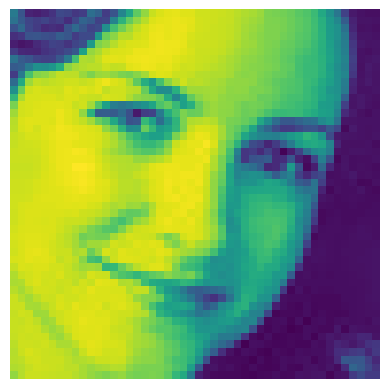

In [4]:
plt.imshow(X_train[15416].reshape(48, 48, 1))
plt.axis('off')
plt.show()

In [5]:
y_train

array(['angry', 'angry', 'angry', ..., 'surprise', 'surprise', 'surprise'],
      dtype='<U8')

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
label = LabelEncoder()
y_train = label.fit_transform(y_train)
y_test = label.fit_transform(y_test)

In [9]:
y_train

array([0, 0, 0, ..., 6, 6, 6])

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [12]:
y_train.shape

(28709, 7)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [15]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))

C:\Users\aghaj\Desktop\ML\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=64, verbose=2)

Epoch 1/15
449/449 - 33s - 73ms/step - accuracy: 0.3188 - loss: 1.6989 - val_accuracy: 0.4210 - val_loss: 1.5002
Epoch 2/15
449/449 - 28s - 62ms/step - accuracy: 0.4440 - loss: 1.4480 - val_accuracy: 0.4838 - val_loss: 1.3494
Epoch 3/15
449/449 - 27s - 61ms/step - accuracy: 0.4902 - loss: 1.3317 - val_accuracy: 0.5045 - val_loss: 1.3025
Epoch 4/15
449/449 - 27s - 61ms/step - accuracy: 0.5259 - loss: 1.2546 - val_accuracy: 0.5266 - val_loss: 1.2328
Epoch 5/15
449/449 - 27s - 60ms/step - accuracy: 0.5470 - loss: 1.1918 - val_accuracy: 0.5449 - val_loss: 1.1960
Epoch 6/15
449/449 - 22s - 48ms/step - accuracy: 0.5689 - loss: 1.1356 - val_accuracy: 0.5517 - val_loss: 1.1778
Epoch 7/15
449/449 - 11s - 24ms/step - accuracy: 0.5905 - loss: 1.0892 - val_accuracy: 0.5580 - val_loss: 1.1704
Epoch 8/15
449/449 - 11s - 24ms/step - accuracy: 0.6010 - loss: 1.0459 - val_accuracy: 0.5634 - val_loss: 1.1567
Epoch 9/15
449/449 - 11s - 24ms/step - accuracy: 0.6188 - loss: 1.0078 - val_accuracy: 0.5705 - 

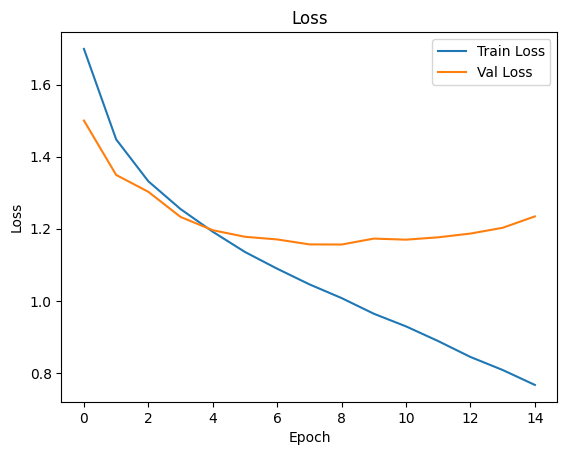

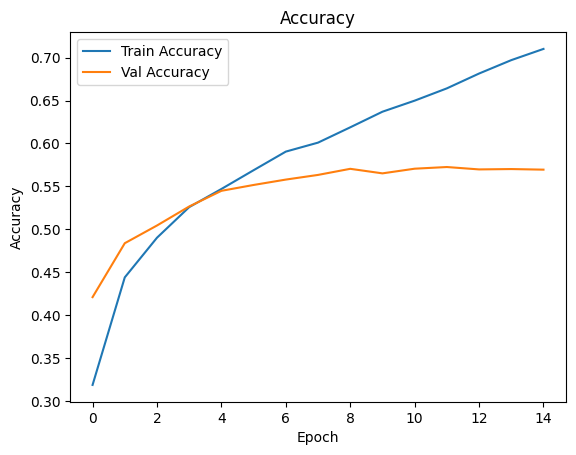

In [19]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
model.save('emotion.h5')